In [ ]:
!pip install yfinance
!pip install tensorflow

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Implementation

In [ ]:
def fill_missing_values(dataset):
  resampled_dataset = dataset.ffill()
  resampled_dataset['Volume'] = dataset['Volume'].fillna(0)
  return resampled_dataset

In [ ]:
gold_30m = yf.download("GC=F", period="60d", interval="30m")
gold_30m.columns = gold_30m.columns.droplevel(1)
gold_30m = fill_missing_values(gold_30m)
gold_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/gold.csv', index=True)

silver_30m = yf.download("SI=F", period="60d", interval="30m")
silver_30m.columns = silver_30m.columns.droplevel(1)
silver_30m = fill_missing_values(silver_30m)
silver_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/silver.csv', index=True)

cad_30m = yf.download("CADUSD=X", period="60d", interval="30m")
cad_30m.columns = cad_30m.columns.droplevel(1)
cad_30m = fill_missing_values(cad_30m)
cad_30m.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/30m/cad.csv', index=True)


gold_1h = yf.download("GC=F", period="730d", interval="1h")
gold_1h.columns = gold_1h.columns.droplevel(1)
gold_1h = fill_missing_values(gold_1h)
gold_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/gold.csv', index=True)

silver_1h = yf.download("SI=F", period="730d", interval="1h")
silver_1h.columns = silver_1h.columns.droplevel(1)
silver_1h = fill_missing_values(silver_1h)
silver_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/silver.csv', index=True)

cad_1h = yf.download("CADUSD=X", period="730d", interval="1h")
cad_1h.columns = cad_1h.columns.droplevel(1)
cad_1h = fill_missing_values(cad_1h)
cad_1h.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1h/cad.csv', index=True)


gold_1d = yf.download("GC=F", period="730d", interval="1d")
gold_1d.columns = gold_1d.columns.droplevel(1)
gold_1d = fill_missing_values(gold_1d)
gold_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/gold.csv', index=True)

silver_1d = yf.download("SI=F", period="730d", interval="1d")
silver_1d.columns = silver_1d.columns.droplevel(1)
silver_1d = fill_missing_values(silver_1d)
silver_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/silver.csv', index=True)

cad_1d = yf.download("CADUSD=X", period="730d", interval="1d")
cad_1d.columns = cad_1d.columns.droplevel(1)
cad_1d = fill_missing_values(cad_1d)
cad_1d.to_csv('/content/drive/MyDrive/ml-datasets/currencies_prediction/1d/cad.csv', index=True)

/tmp/ipython-input-2470658593.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_30m = yf.download("GC=F", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2470658593.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  silver_30m = yf.download("SI=F", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2470658593.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  cad_30m = yf.download("CADUSD=X", period="60d", interval="30m")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2470658593.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_1h = yf.download("GC=F", period="730d", interval="1h")
[*********************100%***********************]  1 of 1 completed
/tmp/ipyth

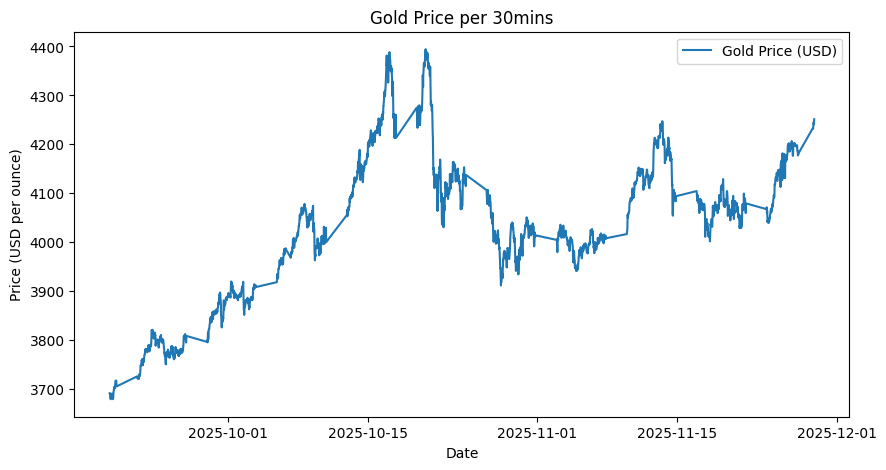

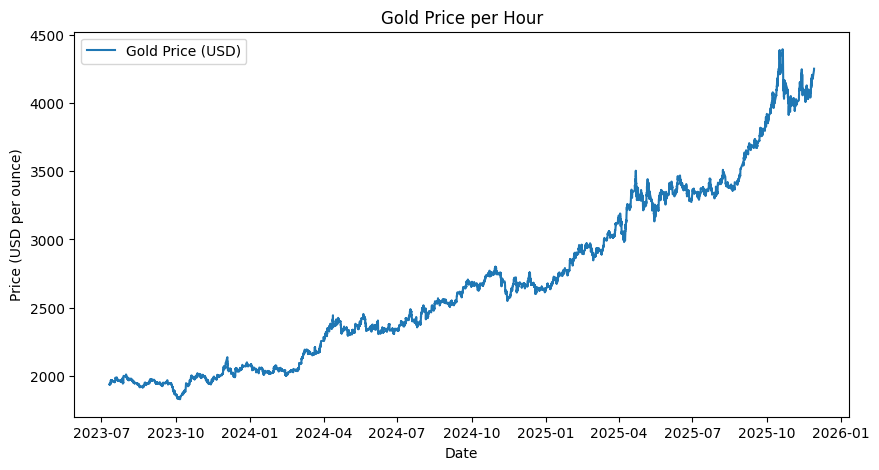

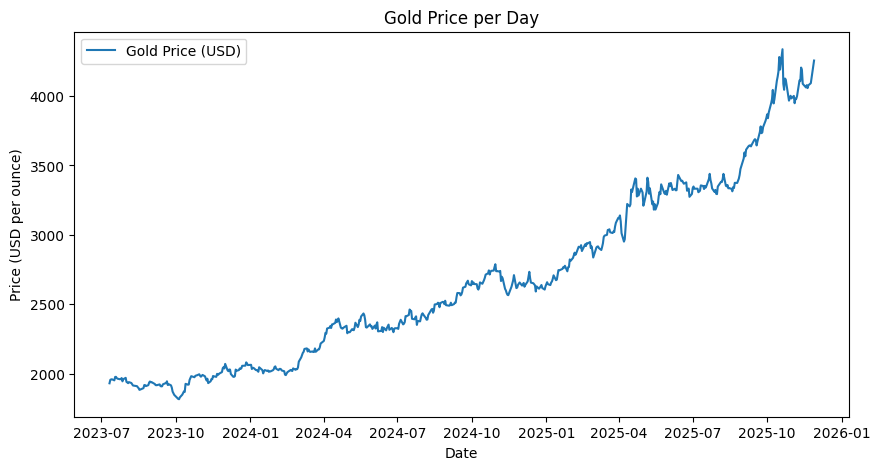

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(gold_30m['Close'], label='Gold Price (USD)')
plt.title("Gold Price per 30mins")
plt.xlabel("Date")
plt.ylabel("Price (USD per ounce)")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(gold_1h['Close'], label='Gold Price (USD)')
plt.title("Gold Price per Hour")
plt.xlabel("Date")
plt.ylabel("Price (USD per ounce)")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(gold_1d['Close'], label='Gold Price (USD)')
plt.title("Gold Price per Day")
plt.xlabel("Date")
plt.ylabel("Price (USD per ounce)")
plt.legend()
plt.show()

In [16]:
gold_30m = gold_30m[["Close"]].rename(columns={"Close": "Gold"})
silver_30m = silver_30m[["Close"]].rename(columns={"Close": "Silver"})
cad_30m = cad_30m[["Close"]].rename(columns={"Close": "CAD"})

In [17]:
all_prices = gold_30m.join([silver_30m, cad_30m], how="outer")
all_prices = all_prices.ffill().bfill() # forward-fill + backward-fill to deal with missing values
all_prices.to_csv("/content/drive/MyDrive/ml-datasets/currencies_prediction/prices_30m.csv")

In [19]:
all_prices.head()

Price,Gold,Silver,CAD
Datetime,,,
2025-09-08 23:00:00+00:00,3692.0,42.605,0.724864
2025-09-08 23:30:00+00:00,3692.0,42.605,0.724879
2025-09-09 00:00:00+00:00,3692.0,42.605,0.724743
2025-09-09 00:30:00+00:00,3692.0,42.605,0.724428
2025-09-09 01:00:00+00:00,3692.0,42.605,0.724071


In [20]:
all_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2819 entries, 2025-09-08 23:00:00+00:00 to 2025-11-28 23:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gold    2819 non-null   float64
 1   Silver  2819 non-null   float64
 2   CAD     2819 non-null   float64
dtypes: float64(3)
memory usage: 88.1 KB


In [21]:
all_prices.describe()

Price,Gold,Silver,CAD
count,2819.000000,2819.000000,2819.000000
mean,3991.053212,48.064552,0.715737
std,180.935285,3.246304,0.004873
min,3679.699951,42.270000,0.707269
25%,3853.799927,46.627501,0.712431
50%,4016.399902,48.195000,0.714464
75%,4125.299805,50.567499,0.718161
max,4394.299805,57.080002,0.728014
